## Assignment 4

This assignment asks you to use resources at hand to apply module 6 - Linear Regression to several sets of data.

## Learning Outcomes

- Exploratory analysis for regression
- Understand difference between linear and non-linear models
- Carry out OLS regression model
- Evaluate model


**Question 1**

* For each data set in Assignment4_linear_regression_data.xlsx:

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

* If the relation is not linear, transform the data accordingly. 
 - Try logarithm, exponential, square root, square, etc., for Y and/or X until you see a linear relation.  You only need to report what is the transformation chosen, not all the attempts. 
 Note:  most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations.  A generic way we did not cover is to use a Box-Cox transformation. 
 
* Create an OLS model for the original and transformed data if required. 
 - Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate. 

 - Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
 - If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)


The output of the assignment should be: 

- OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

- A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

- An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.).  If the model is not linear, you need to transform the equation back to its original form.  

Check out the following if you need further guidance:
http://www.bzst.com/2009/09/interpreting-log-transformed-variables.html

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/

https://stats.stackexchange.com/questions/266722/interpretation-of-linear-regression-results-where-dependent-variable-is-transfor

- If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outlier.


In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy
from scipy import stats

In [2]:
# Read dataset
LinReg1_df = pd.read_csv('Linear Regression Set 1.csv')
LinReg2_df = pd.read_csv('Linear Regression Set 2.csv')
LinReg3_df = pd.read_csv('Linear Regression Set 3.csv')
LinReg4_df = pd.read_csv('Linear Regression Set 4.csv')
LinReg5_df = pd.read_csv('Linear Regression Set 5.csv')
LinReg6_df = pd.read_csv('Linear Regression Set 6.csv')

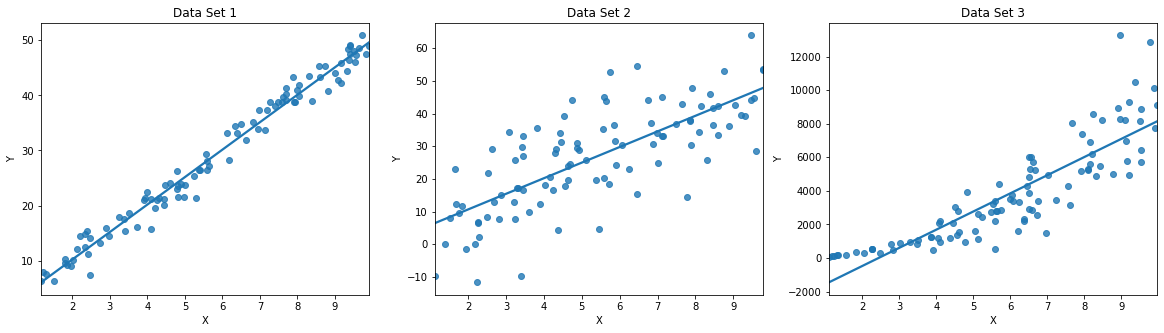

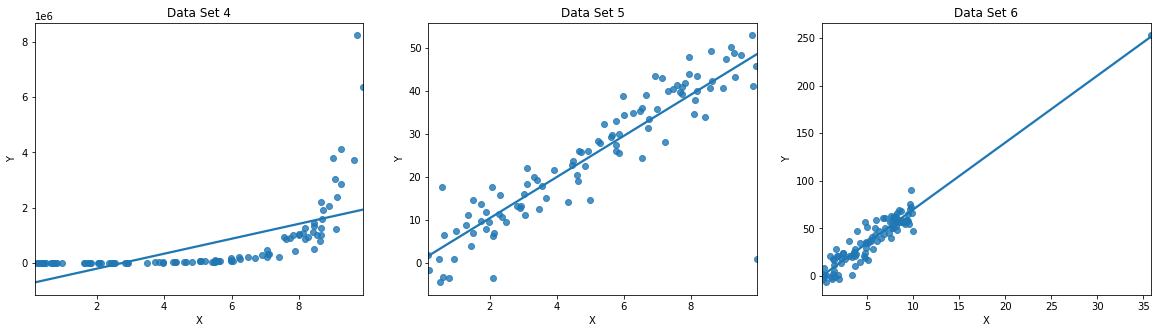

In [3]:
#Scatterplots for datasets
f, axes = plt.subplots(1, 3,figsize=(20,5))
sns.regplot(x=LinReg1_df['x'], y = LinReg1_df['y'], ci=None, ax=axes[0])
sns.regplot(x=LinReg2_df['x'], y = LinReg2_df['y'], ci=None, ax=axes[1])
sns.regplot(x=LinReg3_df['x'], y = LinReg3_df['y'], ci=None, ax=axes[2])

axes[0].set(xlabel='X', ylabel='Y',)
axes[0].set_title('Data Set 1')

axes[1].set(xlabel='X', ylabel='Y',)
axes[1].set_title('Data Set 2')

axes[2].set(xlabel='X', ylabel='Y')
axes[2].set_title('Data Set 3')

f, axes = plt.subplots(1, 3,figsize=(20,5))
sns.regplot(x=LinReg4_df['x'], y = LinReg4_df['y'], ci=None, ax=axes[0])
sns.regplot(x=LinReg5_df['x'], y = LinReg5_df['y'], ci=None, ax=axes[1])
sns.regplot(x=LinReg6_df['x'], y = LinReg6_df['y'], ci=None, ax=axes[2])

axes[0].set(xlabel='X', ylabel='Y')
axes[0].set_title('Data Set 4')

axes[1].set(xlabel='X', ylabel='Y')
axes[1].set_title('Data Set 5')

axes[2].set(xlabel='X', ylabel='Y')
axes[2].set_title('Data Set 6');

### The data sets that need to be transformed to become more linear are Data Sets 3 & 4, as they do not follow the linear trend line.

## Create the OLS model Data Set 1

In [4]:
#OLS model for Original Data Set 1
ols_results = ols('y ~ x', data=LinReg1_df).fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           4.47e-84
Time:                        23:12:40   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.6

### The R-squared value is very close to 1 which means that the model is doing an almost perfect job of explaining the amount of variation in the response. The assumptions that are tested included: linearity, constant variance, and independence of errors. As the datasets other than 3 and 4, strongly satisfy our assumptions, our assumptions are relatively safe for the other remaining datasets such as normality around 0, equal variance, etc.

### For datasets 3 and 4, we try to apply various transformations, some being the logarithm, exponential, square root, square, etc., for Y and/or X until we see a linear relation. Depending on the initial shape, we try a strategic transformation, to form a linear transformation. We try applying the Box-Cox transformations generically to confirm our other matrix findings. Based on our OLS regression results, we generate a table which includes the coefficient value for the intercept as 0.2381 as well as the x-value being 4.9843 for the original data. 

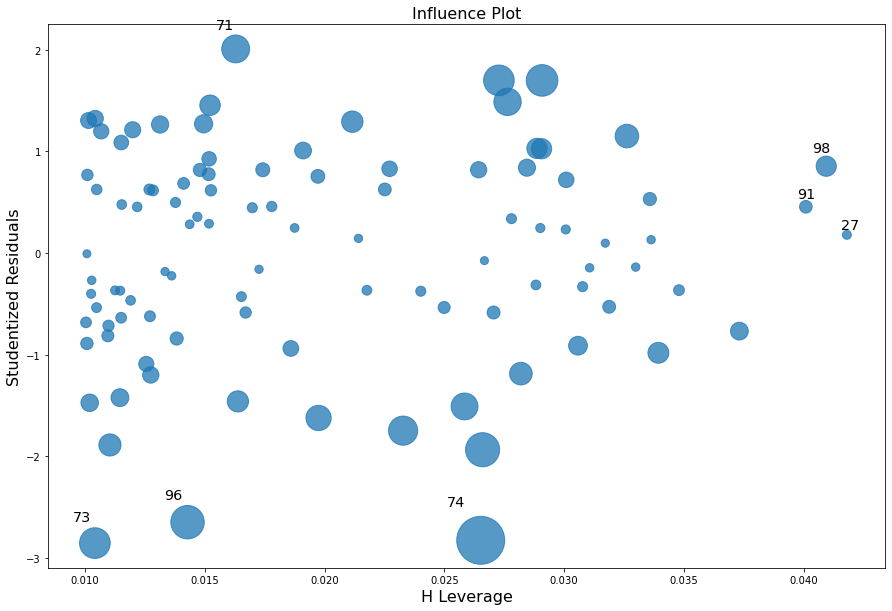

In [5]:
#Identify outliers using an Influence Plot to determine if a better model can be generated by removing outliers
fig, ax = plt.subplots(figsize=(15,10))
fig =sm.graphics.influence_plot(ols_results, ax=ax)